For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

   Use Pandas to import the data from "fcc-forum-pageviews.csv". 
   - Set the index to the date column.
   - Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
   - Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
   - The label on the x axis should be Date and the label on the y axis should be Page Views.
   - Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
   - Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame. Unit tests are written for you under test_module.py.

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col=0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [62]:
df = df.loc[~((df.value <= df.value.quantile(q = 0.025)) | (df.value >= df.value.quantile(q = 0.975)))]

In [63]:
df.max()

value    177588
dtype: int64

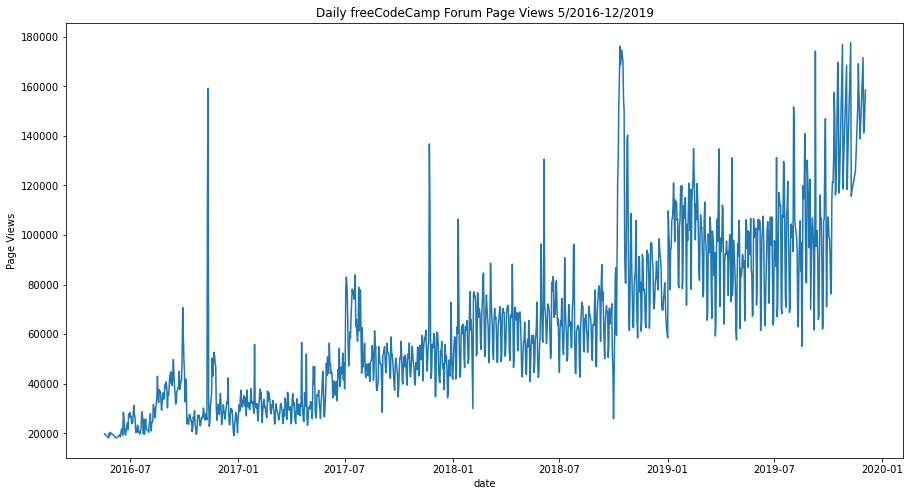

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x=df.index ,y = df.value)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Page Views')
plt.show()

In [68]:
df['year'] = df.index.strftime('%Y')

In [71]:
df['month'] = df.index.strftime('%B')

In [78]:
df.head()

value
year month                 
2016 August    31049.193548
     December  27832.419355
     July      24109.678571
     June      21875.105263
     May       19432.400000

In [81]:
df = df.groupby(['year','month']).mean().sort_index()

In [82]:
df

value
year month                   
2016 August      31049.193548
     December    27832.419355
     July        24109.678571
     June        21875.105263
     May         19432.400000
     November    40448.633333
     October     27398.322581
     September   41476.866667
2017 April       30878.733333
     August      47712.451613
     December    48420.580645
     February    31113.071429
     January     32785.161290
     July        65806.838710
     June        43577.500000
     March       29369.096774
     May         34244.290323
     November    57701.566667
     October     47438.709677
     September   47376.800000
2018 April       62350.833333
     August      62831.612903
     December    80047.483871
     February    65679.000000
     January     58580.096774
     July        63591.064516
     June        70117.000000
     March       62693.774194
     May         56562.870968
     November    78688.333333
     October    111378.142857
     September   65941.733333
2019 April       89368.433333
     August     102717.310345
     December   150733.500000
     February   105968.357143
     January    102056.516129
     July        97236.566667
     June        90435.642857
     March       91214.483871
     May         91439.903226
     November   143166.428571
     October    122802.272727
     September   97268.833333

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

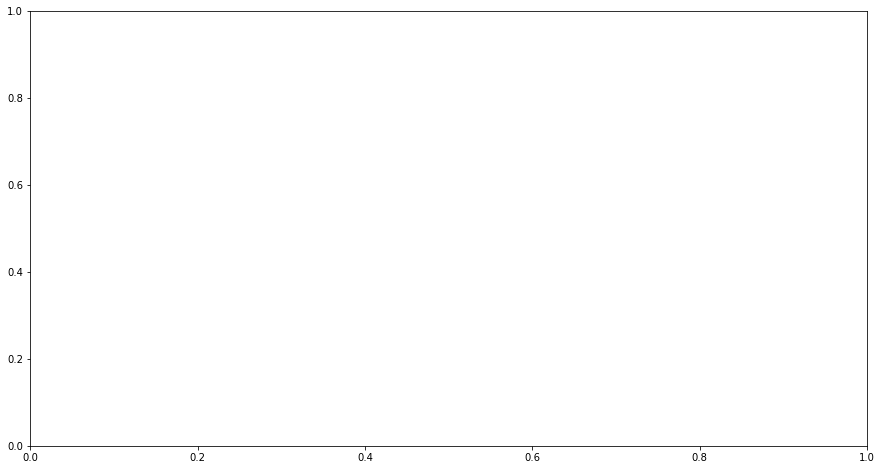

In [67]:
fig = plt.subplots(figsize = (15,8))
ax = sns.barplot(data = df, x= df.index.strftime('%Y'), y = 'value',hue= df.index.strftime('%B') )
ax.set_ylabel("Average Page views")
ax.set
plt.show()